In [1]:
!pwd


/content


In [2]:
#/content/drive/MyDrive/Deep Learning

In [3]:
import os
ROOT = "/content/drive/MyDrive/Deep Learning"
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/Deep Learning'

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [10]:
X.shape

(20640, 8)

In [11]:
y.shape

(20640, 1)

In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [13]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [14]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [15]:
model = tf.keras.models.Sequential(LAYERS)

In [16]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [17]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [20]:
EPOCHS = 5

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/5
363/363 [==============================] - 3s 5ms/step - loss: 0.8538 - coeff_determination: 0.3058 - val_loss: 2.9032 - val_coeff_determination: -1.8150
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4756 - coeff_determination: 0.6211 - val_loss: 0.4039 - val_coeff_determination: 0.6681
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4088 - coeff_determination: 0.6772 - val_loss: 0.3881 - val_coeff_determination: 0.6789
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3900 - coeff_determination: 0.6895 - val_loss: 0.3770 - val_coeff_determination: 0.6879
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3782 - coeff_determination: 0.6995 - val_loss: 0.4500 - val_coeff_determination: 0.6194


In [21]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.853762,0.305751,2.903203,-1.815014
1,0.475569,0.621144,0.403934,0.668113
2,0.408839,0.677198,0.388128,0.678925
3,0.389977,0.689491,0.376997,0.687882
4,0.378204,0.699455,0.450003,0.619419


<Axes: >

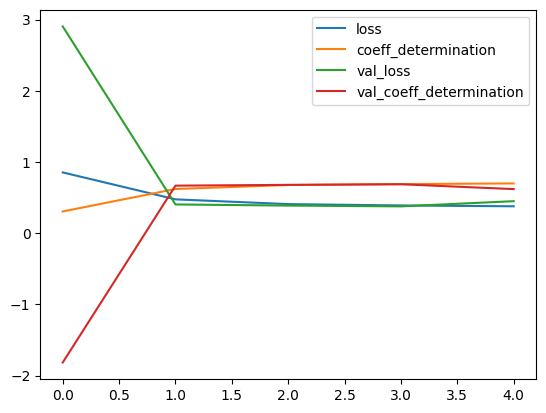

In [22]:
pd.DataFrame(history.history).plot()

In [23]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4802 - coeff_determination: 0.5691


[0.48021432757377625, 0.5690833926200867]

In [24]:
X_test.shape

(5160, 8)

In [25]:
new = X_test[0]

In [26]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [27]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 120ms/step


array([[0.91435295]], dtype=float32)